# Wine dataset classification

In [45]:
import configparser
import numpy as np
import pandas as pd
import logging
import coloredlogs

import aux_functions as aux
from decisiontree import Node


In [46]:
N_SPLITS = 10  # number of cross-validation splits (folds)

In [47]:
# read the configuration file
config = configparser.ConfigParser()
config.read("config.ini")

# configure logger
logger = logging.getLogger(__name__)
coloredlogs.install(level=config['Logging']['level'], logger=logger.parent)


## Load the dataset
a) load data headers

In [11]:
data_headers_fname = config['Data']['data_headers']
data_headers_fname


'./wine_data_headers.txt'

In [12]:
# strip 3 initial characters (row number + closing bracket + optional whitespace)
headers = np.loadtxt(data_headers_fname, dtype=str, delimiter='\n', converters={0: lambda attr: attr[3:]})
headers


array(['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype='<U28')

b) load the data

In [13]:
data_fname = config['Data']['data_file']
data_fname

'./wine_data.txt'

In [14]:
df_input = pd.read_csv(data_fname, names=headers)
df_input.head()

,Class ID,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Decision tree classification
### Define exemplary decision tree


In [21]:
tree = Node(df_input, target_column=int(config['Data']['target_column']))
tree.learn(max_depth=5)
tree.prune(min_points=2)

2019-11-09 01:39:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:39:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:39:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.54 (at threshold 12.7)
2019-11-09 01:39:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.27 (at threshold 2.33)
2019-11-09 01:39:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.14 (at threshold 2.07)
2019-11-09 01:39:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 01:39:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.26 (at threshold 88)
2019-11-09 01:39:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.45 (at threshold 2.05)


2019-11-09 01:39:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.055 (at threshold 1.23)
2019-11-09 01:39:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.055 (at threshold 0.215)
2019-11-09 01:39:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.19 (at threshold 0.725)
2019-11-09 01:39:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.19 (at threshold 3.7)
2019-11-09 01:39:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.055 (at threshold 0.525)
2019-11-09 01:39:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.055 (at threshold 1.29)
2019-11-09 01:39:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.055 (at threshold 426)
2019-11-09 01:39:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen a

2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.044 (at threshold 594)
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Magnesium (expected gain: 0.05)
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Magnesium' with threshold: 98
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 98.0 < Magnesium <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:39:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.02 (at threshold 11.5)
2019-11-09 01:39:21 LAPTOP-

2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.079 (at threshold 12)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.079 (at threshold 1.04)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.079 (at threshold 1.82)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.079 (at threshold 15.7)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.079 (at threshold 91)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.079 (at threshold 2.05)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.079 (at threshold 2)
2019-11-09 01:39:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best 

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 3 node, [0, 1, 1]: class 3 ([3, 3, 2, 3, 3, 3, 3, 2, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 0, 1]: class 2 ([2, 1, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 1, 0]: class 2 ([1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [22]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 3 node, [0, 1, 1]: class 3 ([3, 3, 2, 3, 3, 3, 3, 2, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 0, 1]: class 2 ([2, 1, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 1, 0]: class 2 ([1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Parameter tuning
Tune parameters: maximal tree depth and minimal number of samples required per leaf. Use 10-fold cross-validation.



0it [00:00, ?it/s]2019-11-09 01:00:43 LAPTOP-0NHMJ67U aux_functions[15716] INFO Decision tree learning and testing with 10-fold cross validation



0it [00:00, ?it/s]2019-11-09 01:00:43 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 0 with 160 train samples and 18 test samples
2019-11-09 01:00:43 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  5   7  18  33  54  55  63  80  90  98 106 121 123 141 146 151 160 168]
2019-11-09 01:00:43 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:00:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:00:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.4 (at threshold 13.2)
2019-11-09 01:00:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.24 (at threshold 2.04)
2019-11-09 01:00:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0012 (at threshold 1.51)
2019-11-09 01:00:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG F

2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1.2
2019-11-09 01:00:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1]
20

2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.03 (at threshold 1.76)
2019-11-09 01:00:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 

2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09 01:00:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.33 (at threshold 2.44)
2019-11-09 01:00:53 LAPTOP-0

2019-11-09 01:00:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.00061 (at threshold 0.415)
2019-11-09 01:00:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For 

2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Ash (expected gain: 0.104)
2019-11-09 01:00:58 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute '

2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.032 (at threshold 1.04)
2019-11-09 01:01:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.032 (at thresh

2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at threshold 11.2)
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0017 (at threshold 0.815)
2019-11-09 01:01:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0017 (at threshold 1.53)
2019-

2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0024 (at threshold 0.405)
2019-11-09 01:01:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenol

2019-11-09 01:01:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:01:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:01:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:01:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:01:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:01:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:01:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.027 (at threshold 2.4)
2019-11-09 01:01:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For

2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [0, 0]
2019-11-09 01:01:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 

2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0017 (at threshold 284)
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.1)
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.51
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0]
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 0] is an uniform node - no further splitting
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1]
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 0.51 < Flavanoids <= inf, trace: [0, 0, 1]); not resolved with 0 children
2019-11-09 01:01:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0012 (at threshold 11.2)
2019-11-09 01:01:13 

2019-11-09 01:01:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 1.035 < Malic acid <= inf, trace: [0, 1, 1]); not resolved with 0 children
2019-11-09 01:01:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0019 (at threshold 12.2)
2019-11-09 01:01:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.088 (at threshold 1.21)
2019-11-09 01:01:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.088 (at threshold 1.97)
2019-11-09 01:01:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.088 (at threshold 17.1)
2019-11-09 01:01:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.088 (at threshold 79)
2019-11-09 01:01:16 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0019 (at threshold 1.06)
2019-11-09 01:01:16 LAPTOP-0NHMJ67U de

2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.027 (at threshold 0.17)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.028 (at threshold 0.71)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.028 (at threshold 2.4)
2019-11-09 01:01:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.22 (at threshold 89)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.35 (at threshold 1.81)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.61 (at threshold 2.31)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.2 (at threshold 0.37)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.25 (at threshold 1.29)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.52 (at threshold 3.37)
2019-11-09 01:01:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'H

2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0012 (at threshold 1.67)
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0012 (at threshold 284)
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.141)
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.56
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1]
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1, 1]
2019-11-09 01:01:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 0.56 < Flavanoids <= inf, trace: [0, 0, 1, 1]); not resolved w

2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 1, 1, 1]
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 1.205 < Malic acid <= inf, trace: [0, 1, 1, 1]); not resolved with 0 children
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0013 (at threshold 12.2)
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0013 (at threshold 1.27)
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.1 (at threshold 2.06)
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.1 (at threshold 17.1)
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0013 (at threshold 82.5)
2019-11-09 01:01:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For att

2019-11-09 01:01:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.03 (at threshold 80)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.03 (at threshold 0.71)
2019-11-09 01:01:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315

2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.02 (at threshold 20.6)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.058 (at threshold 94)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.17 (at threshold 1.81)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.51 (at threshold 1.29)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.067 (at threshold 0.425)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.14 (at threshold 1.35)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.68 (at threshold 4.05)
2019-11-09 01:01:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribut

2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.00061 (at threshold 0.745)
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.00061 (at threshold 1.75)
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.00061 (at threshold 284)
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.000613)
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1, 1]
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:01:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 1]) - no further splitting
2019-11-0

2019-11-09 01:01:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1, 1]
2019-11-09 01:01:36 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 0]) - no further splitting
2019-11-09 01:01:36 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 1]) - no further splitting
2019-11-09 01:01:36 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1]
2019-11-09 01:01:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for 2.31 < Flavanoids <= inf, trace: [1]); not resolved with 0 children
2019-11-09 01:01:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.099 (at threshold 13.8)
2019-11-09 01:01:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.027 (at threshold 1.04)
2019-11-09 01:01:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.027 (at thre

2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 12.2)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.032 (at threshold 80)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:01:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attr

2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0017 (at threshold 12.7)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0017 (at threshold 74)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0017 (at threshold 1.24)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.1 (at threshold 0.51)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0017 (at threshold 0.135)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0017 (at threshold 0.415)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0017 (at threshold 1.51)
2019-11-09 01:01:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0024 (at threshold 0.585)
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0024 (at threshold 4.22)
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0024 (at threshold 0.51)
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0049 (at threshold 1.29)
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.077 (at threshold 404)
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0765)
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1
2019-11-09 01:01:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1]
2019-11-

2019-11-09 01:01:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Proline (expected gain: 0.175)
2019-11-09 01:01:46 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Proline' with threshold: 1.1e+03
2019-11-09 01:01:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1]
2019-11-09 01:01:46 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0]
2019-11-09 01:01:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Proline <= 1112.5, trace: [1, 0]); not resolved with 0 children
2019-11-09 01:01:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.028 (at threshold 11.5)
2019-11-09 01:01:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.028 (at threshold 1.04)
2019-11-09 01:01:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.028 (at threshold 1.76)
2019-11-09 01:01:47 LAPT

2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 1]
2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [1, 0]
2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [1, 0]
2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] INFO Testing score: 1.0 (18/18 samples)



7it [01:06,  9.48s/it]2019-11-09 01:01:49 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 7 with 160 train samples and 18 test samples
2019-11-09 01:01:49 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  1  17  28  31  34  38  42  53  65 105 114 120 128 132 133 139 143 154]
2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:01:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain 

2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0012 (at threshold 1.53)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:01:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute

2019-11-09 01:01:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0019 (at threshold 0.19)
2019-11-09 01:01:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:01:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:01:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:01:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:01:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:01:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:01:55 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at att

2019-11-09 01:01:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0284)
2019-11-09 01:01:57 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:01:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:01:57 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:01:57 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:01:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:01:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:01:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:01:58 LAPTOP

2019-11-09 01:02:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.57 (at threshold 2.08)
2019-11-09 01:02:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:02:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:02:01 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:02:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:02:01 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:02:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:02:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09

2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.00061 (at threshold 0.815)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:02:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attri

2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0013 (at threshold 0.405)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:02:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG

2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.03 (at threshold 347)
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.03)
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:02:08 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11

2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.51 (at threshold 2.08)
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.094 (at threshold 563)
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:02:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at thre

2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for 4.05 < Color intensity <= inf, trace: [0, 1]); not resolved with 0 children
2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:02:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:02:12 LAPTOP-0NHMJ67U d

2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.054 (at threshold 108)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:02:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/O

2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.032 (at threshold 2.4)
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:02:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:02:15 LAPTOP

2019-11-09 01:02:16 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-09 01:02:16 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:16 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:16 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:16 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:16 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
2019-11-09 01:02:16 LAPTOP-0NHMJ

2019-11-09 01:02:17 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:17 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal black normal>) = 10.525
2019-11-09 01:02:17 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
2019-11-09 01:02:17 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal bold condensed>) = 7.8986363636363635
2019-11-09 01:02:17 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:02:17 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:0

2019-11-09 01:02:18 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:19 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:19 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:19 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:19 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:19 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
2019-11-09 01:02:19 LAPTOP-0NHMJ67U matplotlib.

2019-11-09 01:02:20 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:02:20 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal bold condensed>) = 10.535
2019-11-09 01:02:20 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:20 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal book normal>) = 10.05
2019-11-09 01:02:20 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:20 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
2019-11-09

2019-11-09 01:02:21 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2019-11-09 01:02:21 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:21 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Consolas' (consolab.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:21 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal bold normal>) = 11.335
2019-11-09 01:02:21 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>) = 11.05
2019-11-09 01:02:21 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:21 LAPTOP-0NHMJ67U matp

2019-11-09 01:02:22 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:22 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
2019-11-09 01:02:22 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:22 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:22 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal book normal>) = 11.05
2019-11-09 01:02:22 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal bold normal>) = 11.335
2019-11-09 01:02:22 LAPTOP-0NHM

2019-11-09 01:02:23 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
2019-11-09 01:02:23 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
2019-11-09 01:02:23 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
2019-11-09 01:02:23 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:23 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:02:23 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
2019-11-09 01:02:23 LAPTOP-0NHMJ67U matpl

2019-11-09 01:02:24 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:24 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:24 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:24 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:24 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:24 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2019-11-09 01:02:24 L

2019-11-09 01:02:25 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2019-11-09 01:02:25 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
2019-11-09 01:02:25 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
2019-11-09 01:02:25 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) = 10.335
2019-11-09 01:02:25 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:25 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2019-11-09 01:02:25 LAPTOP-0NH

2019-11-09 01:02:26 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:26 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal bold normal>) = 11.335
2019-11-09 01:02:26 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>) = 10.43
2019-11-09 01:02:26 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:26 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 6.888636363636364
2019-11-09 01:02:26 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
2019-11

2019-11-09 01:02:27 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
2019-11-09 01:02:27 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:27 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:27 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal demi normal>) = 10.24
2019-11-09 01:02:27 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:27 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
2019-11-09 01:02:27 L

2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal light normal>) = 10.24
2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal bold normal>) = 11.335
2019-11-09 01:02:28 LAPTOP-0NHMJ67U mat

2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:02:28 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal light normal>) = 10.24
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal medium condensed>) = 10.344999999999999
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
2019-11-09 01:02:29 LAP

2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:29 LAPTOP-0NHMJ67U matplotlib.fo

2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal bold normal>) = 10.335
2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.font_manager[15716] DEBUG findfont: score(<Font 'Candara' (Candarab.ttf) normal normal bold normal>) = 10.335
2019-11-09 01:02:30 LAPTOP-0NHMJ67U matplotlib.

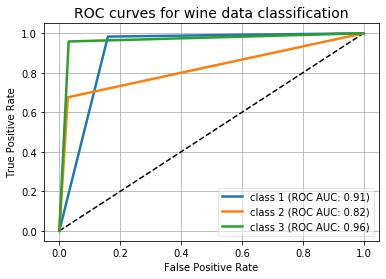



1it [01:48, 108.02s/it]2019-11-09 01:02:31 LAPTOP-0NHMJ67U aux_functions[15716] INFO Decision tree learning and testing with 10-fold cross validation



0it [00:00, ?it/s]2019-11-09 01:02:31 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 0 with 160 train samples and 18 test samples
2019-11-09 01:02:31 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  5   7  18  33  54  55  63  80  90  98 106 121 123 141 146 151 160 168]
2019-11-09 01:02:31 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:02:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:02:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.4 (at threshold 13.2)
2019-11-09 01:02:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.24 (at threshold 2.04)
2019-11-09 01:02:31 LAPTOP-0NHMJ67U decisiontree[15716] DEB

2019-11-09 01:02:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:02:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:02:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:02:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:02:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:02:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:02:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0012 (at threshold 1.51)
2019-11-09 01:02:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG F

2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1.2
2019-11-09 01:02:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1]
20

2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.03 (at threshold 1.76)
2019-11-09 01:02:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 

2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09 01:02:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.33 (at threshold 2.44)
2019-11-09 01:02:39 LAPTOP-0

2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.00061 (at threshold 0.415)
2019-11-09 01:02:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For 

2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Ash (expected gain: 0.104)
2019-11-09 01:02:42 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute '

2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.032 (at threshold 1.04)
2019-11-09 01:02:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.032 (at thresh

2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at threshold 11.2)
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0017 (at threshold 0.815)
2019-11-09 01:02:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0017 (at threshold 1.53)
2019-

2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0024 (at threshold 0.405)
2019-11-09 01:02:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenol

2019-11-09 01:02:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:02:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:02:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:02:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:02:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:02:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:02:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.027 (at threshold 2.4)
2019-11-09 01:02:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For

2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [0, 0]
2019-11-09 01:02:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 

2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0017 (at threshold 284)
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.1)
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.51
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0]
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 0] is an uniform node - no further splitting
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1]
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 0.51 < Flavanoids <= inf, trace: [0, 0, 1]); not resolved with 0 children
2019-11-09 01:02:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0012 (at threshold 11.2)
2019-11-09 01:02:53 

2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 1.035 < Malic acid <= inf, trace: [0, 1, 1]); not resolved with 0 children
2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0019 (at threshold 12.2)
2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.088 (at threshold 1.21)
2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.088 (at threshold 1.97)
2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.088 (at threshold 17.1)
2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.088 (at threshold 79)
2019-11-09 01:02:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0019 (at threshold 1.06)
2019-11-09 01:02:55 LAPTOP-0NHMJ67U de

2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.027 (at threshold 0.17)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.028 (at threshold 0.71)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.028 (at threshold 2.4)
2019-11-09 01:02:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:02:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 01:02:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.22 (at threshold 89)
2019-11-09 01:02:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.35 (at threshold 1.81)
2019-11-09 01:02:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.61 (at threshold 2.31)
2019-11-09 01:02:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.2 (at threshold 0.37)
2019-11-09 01:02:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.25 (at threshold 1.29)
2019-11-09 01:02:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.52 (at threshold 3.37)
2019-11-09 01:02:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'H

2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0012 (at threshold 1.67)
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0012 (at threshold 284)
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.141)
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.56
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1]
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1, 1]
2019-11-09 01:03:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 0.56 < Flavanoids <= inf, trace: [0, 0, 1, 1]); not resolved w

2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 1, 1, 1]
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 1.205 < Malic acid <= inf, trace: [0, 1, 1, 1]); not resolved with 0 children
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0013 (at threshold 12.2)
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0013 (at threshold 1.27)
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.1 (at threshold 2.06)
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.1 (at threshold 17.1)
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0013 (at threshold 82.5)
2019-11-09 01:03:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For att

2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.03 (at threshold 80)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.03 (at threshold 0.71)
2019-11-09 01:03:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315

2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.02 (at threshold 20.6)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.058 (at threshold 94)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.17 (at threshold 1.81)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.51 (at threshold 1.29)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.067 (at threshold 0.425)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.14 (at threshold 1.35)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.68 (at threshold 4.05)
2019-11-09 01:03:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribut

2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.00061 (at threshold 0.745)
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.00061 (at threshold 1.75)
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.00061 (at threshold 284)
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.000613)
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1, 1]
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:03:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 1]) - no further splitting
2019-11-0

2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1, 1]
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 0]) - no further splitting
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 1]) - no further splitting
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1]
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for 2.31 < Flavanoids <= inf, trace: [1]); not resolved with 0 children
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.099 (at threshold 13.8)
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.027 (at threshold 1.04)
2019-11-09 01:03:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.027 (at thre

2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 12.2)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.032 (at threshold 80)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:03:11 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attr

2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0017 (at threshold 12.7)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0017 (at threshold 74)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0017 (at threshold 1.24)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.1 (at threshold 0.51)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0017 (at threshold 0.135)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0017 (at threshold 0.415)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0017 (at threshold 1.51)
2019-11-09 01:03:13 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0024 (at threshold 0.585)
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0024 (at threshold 4.22)
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0024 (at threshold 0.51)
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0049 (at threshold 1.29)
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.077 (at threshold 404)
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0765)
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1
2019-11-09 01:03:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1]
2019-11-

2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Proline (expected gain: 0.175)
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Proline' with threshold: 1.1e+03
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1]
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0]
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Proline <= 1112.5, trace: [1, 0]); not resolved with 0 children
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.028 (at threshold 11.5)
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.028 (at threshold 1.04)
2019-11-09 01:03:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.028 (at threshold 1.76)
2019-11-09 01:03:17 LAPT

2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 1]
2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [1, 0]
2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [1, 0]
2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] INFO Testing score: 1.0 (18/18 samples)



7it [00:47,  6.84s/it]2019-11-09 01:03:18 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 7 with 160 train samples and 18 test samples
2019-11-09 01:03:18 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  1  17  28  31  34  38  42  53  65 105 114 120 128 132 133 139 143 154]
2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:03:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain 

2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0012 (at threshold 1.53)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:03:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute

2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0019 (at threshold 0.19)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:03:23 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at att

2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0284)
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:03:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:03:26 LAPTOP

2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.57 (at threshold 2.08)
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:03:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09

2019-11-09 01:03:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.00061 (at threshold 0.815)
2019-11-09 01:03:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:03:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:03:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:03:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:03:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:03:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:03:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attri

2019-11-09 01:03:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0013 (at threshold 0.405)
2019-11-09 01:03:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:03:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:03:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:03:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:03:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:03:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:03:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG

2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.03 (at threshold 347)
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.03)
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:03:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11

2019-11-09 01:03:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.51 (at threshold 2.08)
2019-11-09 01:03:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.094 (at threshold 563)
2019-11-09 01:03:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:03:41 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:03:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:03:41 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:03:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:03:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at thre

2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for 4.05 < Color intensity <= inf, trace: [0, 1]); not resolved with 0 children
2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:03:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:03:43 LAPTOP-0NHMJ67U d

2019-11-09 01:03:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.054 (at threshold 108)
2019-11-09 01:03:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:03:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:03:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:03:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:03:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:03:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:03:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/O

2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.032 (at threshold 2.4)
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:03:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:03:48 LAPTOP

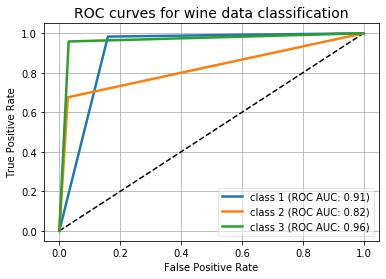



2it [03:05, 98.92s/it] 2019-11-09 01:03:48 LAPTOP-0NHMJ67U aux_functions[15716] INFO Decision tree learning and testing with 10-fold cross validation



0it [00:00, ?it/s]2019-11-09 01:03:49 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 0 with 160 train samples and 18 test samples
2019-11-09 01:03:49 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  5   7  18  33  54  55  63  80  90  98 106 121 123 141 146 151 160 168]
2019-11-09 01:03:49 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:03:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:03:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.4 (at threshold 13.2)
2019-11-09 01:03:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.24 (at threshold 2.04)
2019-11-09 01:03:49 LAPTOP-0NHMJ67U decisiontree[15716] DEB

2019-11-09 01:03:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:03:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:03:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:03:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:03:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:03:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:03:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0012 (at threshold 1.51)
2019-11-09 01:03:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG F

2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1.2
2019-11-09 01:03:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1]
20

2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:03:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.03 (at threshold 1.76)
2019-11-09 01:03:57 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 

2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09 01:03:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.33 (at threshold 2.44)
2019-11-09 01:03:59 LAPTOP-0

2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.00061 (at threshold 0.415)
2019-11-09 01:04:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For 

2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Ash (expected gain: 0.104)
2019-11-09 01:04:04 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute '

2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.032 (at threshold 1.04)
2019-11-09 01:04:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.032 (at thresh

2019-11-09 01:04:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:04:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:04:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:04:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:04:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:04:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at threshold 11.2)
2019-11-09 01:04:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0017 (at threshold 0.815)
2019-11-09 01:04:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0017 (at threshold 1.53)
2019-

2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0024 (at threshold 0.405)
2019-11-09 01:04:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenol

2019-11-09 01:04:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:04:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:04:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:04:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:04:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:04:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:04:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.027 (at threshold 2.4)
2019-11-09 01:04:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For

2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [0, 0]
2019-11-09 01:04:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 

2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0017 (at threshold 284)
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.1)
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.51
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0]
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 0] is an uniform node - no further splitting
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1]
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 0.51 < Flavanoids <= inf, trace: [0, 0, 1]); not resolved with 0 children
2019-11-09 01:04:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0012 (at threshold 11.2)
2019-11-09 01:04:20 

2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 1.035 < Malic acid <= inf, trace: [0, 1, 1]); not resolved with 0 children
2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0019 (at threshold 12.2)
2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.088 (at threshold 1.21)
2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.088 (at threshold 1.97)
2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.088 (at threshold 17.1)
2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.088 (at threshold 79)
2019-11-09 01:04:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0019 (at threshold 1.06)
2019-11-09 01:04:23 LAPTOP-0NHMJ67U de

2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.027 (at threshold 0.17)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.028 (at threshold 0.71)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.028 (at threshold 2.4)
2019-11-09 01:04:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.22 (at threshold 89)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.35 (at threshold 1.81)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.61 (at threshold 2.31)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.2 (at threshold 0.37)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.25 (at threshold 1.29)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.52 (at threshold 3.37)
2019-11-09 01:04:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'H

2019-11-09 01:04:30 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0012 (at threshold 1.67)
2019-11-09 01:04:30 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0012 (at threshold 284)
2019-11-09 01:04:30 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.141)
2019-11-09 01:04:31 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.56
2019-11-09 01:04:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1]
2019-11-09 01:04:31 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:04:31 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1, 1]
2019-11-09 01:04:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 0.56 < Flavanoids <= inf, trace: [0, 0, 1, 1]); not resolved w

2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 1, 1, 1]
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 1.205 < Malic acid <= inf, trace: [0, 1, 1, 1]); not resolved with 0 children
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0013 (at threshold 12.2)
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0013 (at threshold 1.27)
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.1 (at threshold 2.06)
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.1 (at threshold 17.1)
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0013 (at threshold 82.5)
2019-11-09 01:04:33 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For att

2019-11-09 01:04:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.03 (at threshold 80)
2019-11-09 01:04:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:04:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:04:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:04:35 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:04:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:04:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.03 (at threshold 0.71)
2019-11-09 01:04:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315

2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.02 (at threshold 20.6)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.058 (at threshold 94)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.17 (at threshold 1.81)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.51 (at threshold 1.29)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.067 (at threshold 0.425)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.14 (at threshold 1.35)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.68 (at threshold 4.05)
2019-11-09 01:04:38 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribut

2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.00061 (at threshold 0.745)
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.00061 (at threshold 1.75)
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.00061 (at threshold 284)
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.000613)
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1, 1]
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:04:41 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 1]) - no further splitting
2019-11-0

2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1, 1]
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 0]) - no further splitting
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 1]) - no further splitting
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1]
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for 2.31 < Flavanoids <= inf, trace: [1]); not resolved with 0 children
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.099 (at threshold 13.8)
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.027 (at threshold 1.04)
2019-11-09 01:04:43 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.027 (at thre

2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 12.2)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.032 (at threshold 80)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:04:46 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attr

2019-11-09 01:04:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0017 (at threshold 12.7)
2019-11-09 01:04:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0017 (at threshold 74)
2019-11-09 01:04:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0017 (at threshold 1.24)
2019-11-09 01:04:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.1 (at threshold 0.51)
2019-11-09 01:04:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0017 (at threshold 0.135)
2019-11-09 01:04:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0017 (at threshold 0.415)
2019-11-09 01:04:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0017 (at threshold 1.51)
2019-11-09 01:04:49 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0024 (at threshold 0.585)
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0024 (at threshold 4.22)
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0024 (at threshold 0.51)
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0049 (at threshold 1.29)
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.077 (at threshold 404)
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0765)
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1
2019-11-09 01:04:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1]
2019-11-

2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Proline (expected gain: 0.175)
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Proline' with threshold: 1.1e+03
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1]
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0]
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Proline <= 1112.5, trace: [1, 0]); not resolved with 0 children
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.028 (at threshold 11.5)
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.028 (at threshold 1.04)
2019-11-09 01:04:54 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.028 (at threshold 1.76)
2019-11-09 01:04:54 LAPT

2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 1]
2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [1, 0]
2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [1, 0]
2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Testing score: 1.0 (18/18 samples)



7it [01:07,  9.68s/it]2019-11-09 01:04:56 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 7 with 160 train samples and 18 test samples
2019-11-09 01:04:56 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  1  17  28  31  34  38  42  53  65 105 114 120 128 132 133 139 143 154]
2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:04:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain 

2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0012 (at threshold 1.53)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:04:59 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute

2019-11-09 01:05:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0019 (at threshold 0.19)
2019-11-09 01:05:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:05:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:05:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:05:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:05:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:05:02 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:05:02 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at att

2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0284)
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:05:04 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:05:04 LAPTOP

2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.57 (at threshold 2.08)
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:05:07 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09

2019-11-09 01:05:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.00061 (at threshold 0.815)
2019-11-09 01:05:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:05:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:05:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:05:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:05:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:05:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:05:10 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attri

2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0013 (at threshold 0.405)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:05:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG

2019-11-09 01:05:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.03 (at threshold 347)
2019-11-09 01:05:14 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.03)
2019-11-09 01:05:14 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:05:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:05:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:05:15 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:05:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:05:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11

2019-11-09 01:05:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.51 (at threshold 2.08)
2019-11-09 01:05:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.094 (at threshold 563)
2019-11-09 01:05:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:05:17 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:05:17 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:05:18 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:05:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:05:18 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at thre

2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for 4.05 < Color intensity <= inf, trace: [0, 1]); not resolved with 0 children
2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:05:20 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:05:20 LAPTOP-0NHMJ67U d

2019-11-09 01:05:22 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.054 (at threshold 108)
2019-11-09 01:05:22 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:05:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:05:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:05:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:05:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:05:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:05:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/O

2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.032 (at threshold 2.4)
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:05:25 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:05:25 LAPTOP

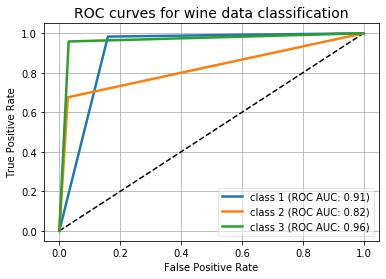



3it [04:42, 98.40s/it]2019-11-09 01:05:26 LAPTOP-0NHMJ67U aux_functions[15716] INFO Decision tree learning and testing with 10-fold cross validation



0it [00:00, ?it/s]2019-11-09 01:05:26 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 0 with 160 train samples and 18 test samples
2019-11-09 01:05:26 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  5   7  18  33  54  55  63  80  90  98 106 121 123 141 146 151 160 168]
2019-11-09 01:05:26 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:05:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:05:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.4 (at threshold 13.2)
2019-11-09 01:05:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.24 (at threshold 2.04)
2019-11-09 01:05:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBU

2019-11-09 01:05:28 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0012 (at threshold 1.51)
2019-11-09 01:05:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG F

2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1.2
2019-11-09 01:05:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1]
20

2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.03 (at threshold 1.76)
2019-11-09 01:05:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 

2019-11-09 01:05:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:05:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:05:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:05:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:05:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:05:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:05:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09 01:05:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.33 (at threshold 2.44)
2019-11-09 01:05:37 LAPTOP-0

2019-11-09 01:05:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:05:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:05:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:05:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:05:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:05:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:05:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.00061 (at threshold 0.415)
2019-11-09 01:05:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For 

2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:05:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Ash (expected gain: 0.104)
2019-11-09 01:05:43 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute '

2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.032 (at threshold 1.04)
2019-11-09 01:05:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.032 (at thresh

2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at threshold 11.2)
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0017 (at threshold 0.815)
2019-11-09 01:05:48 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0017 (at threshold 1.53)
2019-

2019-11-09 01:05:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:05:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:05:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:05:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:05:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:05:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:05:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0024 (at threshold 0.405)
2019-11-09 01:05:51 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenol

2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.027 (at threshold 2.4)
2019-11-09 01:05:53 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For

2019-11-09 01:05:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:05:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:05:55 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:05:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:05:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:05:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:05:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:05:56 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [0, 0]
2019-11-09 01:05:56 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 

2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0017 (at threshold 284)
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.1)
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.51
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0]
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 0] is an uniform node - no further splitting
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1]
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 0.51 < Flavanoids <= inf, trace: [0, 0, 1]); not resolved with 0 children
2019-11-09 01:05:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0012 (at threshold 11.2)
2019-11-09 01:05:58 

2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 1.035 < Malic acid <= inf, trace: [0, 1, 1]); not resolved with 0 children
2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0019 (at threshold 12.2)
2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.088 (at threshold 1.21)
2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.088 (at threshold 1.97)
2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.088 (at threshold 17.1)
2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.088 (at threshold 79)
2019-11-09 01:06:01 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0019 (at threshold 1.06)
2019-11-09 01:06:01 LAPTOP-0NHMJ67U de

2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.027 (at threshold 0.17)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.028 (at threshold 2.21)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.028 (at threshold 0.71)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.028 (at threshold 2.4)
2019-11-09 01:06:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.25 (at threshold 17.6)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.22 (at threshold 89)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.35 (at threshold 1.81)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.61 (at threshold 2.31)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.2 (at threshold 0.37)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.25 (at threshold 1.29)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.52 (at threshold 3.37)
2019-11-09 01:06:06 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'H

2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0012 (at threshold 1.67)
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0012 (at threshold 284)
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.141)
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 0.56
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1]
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [0, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0, 1, 1]
2019-11-09 01:06:09 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 0.56 < Flavanoids <= inf, trace: [0, 0, 1, 1]); not resolved w

2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 1, 1, 1]
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 1.205 < Malic acid <= inf, trace: [0, 1, 1, 1]); not resolved with 0 children
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0013 (at threshold 12.2)
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.0013 (at threshold 1.27)
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.1 (at threshold 2.06)
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.1 (at threshold 17.1)
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0013 (at threshold 82.5)
2019-11-09 01:06:12 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For att

2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.03 (at threshold 80)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.03 (at threshold 2.21)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.03 (at threshold 0.71)
2019-11-09 01:06:15 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315

2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.02 (at threshold 20.6)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.058 (at threshold 94)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.17 (at threshold 1.81)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.51 (at threshold 1.29)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.067 (at threshold 0.425)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.14 (at threshold 1.35)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.68 (at threshold 4.05)
2019-11-09 01:06:19 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribut

2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.00061 (at threshold 0.745)
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.00061 (at threshold 1.75)
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.00061 (at threshold 284)
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.000613)
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 0, 1, 1]
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:06:21 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 0, 1, 1, 1]) - no further splitting
2019-11-0

2019-11-09 01:06:23 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1, 1, 1]
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 0]) - no further splitting
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [0, 1, 1, 1, 1]) - no further splitting
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1]
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for 2.31 < Flavanoids <= inf, trace: [1]); not resolved with 0 children
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.099 (at threshold 13.8)
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.027 (at threshold 1.04)
2019-11-09 01:06:24 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.027 (at thre

2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.013 (at threshold 12.2)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.032 (at threshold 80)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.013 (at threshold 2.35)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.026 (at threshold 0.17)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.013 (at threshold 1.27)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.032 (at threshold 2.21)
2019-11-09 01:06:26 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attr

2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0017 (at threshold 12.7)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0017 (at threshold 74)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0017 (at threshold 1.24)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.1 (at threshold 0.51)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0017 (at threshold 0.135)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0017 (at threshold 0.415)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0017 (at threshold 1.51)
2019-11-09 01:06:29 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Fo

2019-11-09 01:06:31 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0024 (at threshold 0.585)
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0024 (at threshold 4.22)
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0024 (at threshold 0.51)
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0049 (at threshold 1.29)
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.077 (at threshold 404)
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0765)
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Malic acid' with threshold: 1
2019-11-09 01:06:32 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0, 1]
2019-11-

2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Proline (expected gain: 0.175)
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Proline' with threshold: 1.1e+03
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1]
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0]
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Proline <= 1112.5, trace: [1, 0]); not resolved with 0 children
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.028 (at threshold 11.5)
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.028 (at threshold 1.04)
2019-11-09 01:06:34 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.028 (at threshold 1.76)
2019-11-09 01:06:34 LAPT

2019-11-09 01:06:36 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [0, 1]
2019-11-09 01:06:36 LAPTOP-0NHMJ67U decisiontree[15716] INFO Pruning at node [1, 0]
2019-11-09 01:06:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Undoing split at node [1, 0]
2019-11-09 01:06:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Testing score: 1.0 (18/18 samples)



7it [01:10, 10.08s/it]2019-11-09 01:06:37 LAPTOP-0NHMJ67U aux_functions[15716] INFO Cross-validation round 7 with 160 train samples and 18 test samples
2019-11-09 01:06:37 LAPTOP-0NHMJ67U aux_functions[15716] DEBUG Test indices: [  1  17  28  31  34  38  42  53  65 105 114 120 128 132 133 139 143 154]
2019-11-09 01:06:37 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node []
2019-11-09 01:06:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 0 tree node (root); not resolved with 0 children
2019-11-09 01:06:37 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain 

2019-11-09 01:06:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.0012 (at threshold 1.53)
2019-11-09 01:06:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.0012 (at threshold 12.7)
2019-11-09 01:06:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.0012 (at threshold 74)
2019-11-09 01:06:39 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0012 (at threshold 1.24)
2019-11-09 01:06:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.14 (at threshold 0.56)
2019-11-09 01:06:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0012 (at threshold 0.135)
2019-11-09 01:06:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0012 (at threshold 0.415)
2019-11-09 01:06:40 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute

2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0019 (at threshold 0.19)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0019 (at threshold 0.585)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0019 (at threshold 4.22)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0019 (at threshold 0.51)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0038 (at threshold 1.29)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0019 (at threshold 420)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Malic acid (expected gain: 0.0875)
2019-11-09 01:06:42 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at att

2019-11-09 01:06:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0284)
2019-11-09 01:06:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 11
2019-11-09 01:06:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0]
2019-11-09 01:06:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 0] is an uniform node - no further splitting
2019-11-09 01:06:44 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1]
2019-11-09 01:06:44 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 3 tree node (for 11.455 < Alcohol <= inf, trace: [1, 0, 1]); not resolved with 0 children
2019-11-09 01:06:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.03 (at threshold 11.5)
2019-11-09 01:06:45 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.03 (at threshold 1.04)
2019-11-09 01:06:45 LAPTOP

2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.57 (at threshold 2.08)
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.53 (at threshold 712)
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Flavanoids (expected gain: 0.612)
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Flavanoids' with threshold: 2.3
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node []
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0]
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 1 tree node (for -inf < Flavanoids <= 2.31, trace: [0]); not resolved with 0 children
2019-11-09 01:06:47 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.31 (at threshold 12.6)
2019-11-09

2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.00061 (at threshold 0.815)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.00061 (at threshold 1.53)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.00061 (at threshold 12.7)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.00061 (at threshold 74)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.00061 (at threshold 1.24)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.00061 (at threshold 0.78)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.00061 (at threshold 0.135)
2019-11-09 01:06:50 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attri

2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.0013 (at threshold 0.405)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.0013 (at threshold 0.19)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.0013 (at threshold 0.585)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.0013 (at threshold 4.22)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.0013 (at threshold 0.51)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.0026 (at threshold 1.29)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.0013 (at threshold 420)
2019-11-09 01:06:52 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG

2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.03 (at threshold 347)
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.03)
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1]
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 0, 1, 0] is an uniform node - no further splitting
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [1, 0, 1, 1]
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 4 tree node (for 11.510000000000002 < Alcohol <= inf, trace: [1, 0, 1, 1]); not resolved with 0 children
2019-11-09 01:06:55 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.032 (at threshold 11.6)
2019-11

2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.51 (at threshold 2.08)
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.094 (at threshold 563)
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Color intensity (expected gain: 0.68)
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Color intensity' with threshold: 4
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [0]
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] INFO Performing split of node [0, 0]
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for -inf < Color intensity <= 4.05, trace: [0, 0]); not resolved with 0 children
2019-11-09 01:06:58 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0017 (at thre

2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Choosing split attribute for Level 2 tree node (for 4.05 < Color intensity <= inf, trace: [0, 1]); not resolved with 0 children
2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcohol', best gain is 0.0024 (at threshold 12.2)
2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Malic acid', best gain is 0.077 (at threshold 1.03)
2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Ash', best gain is 0.077 (at threshold 1.81)
2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Alcalinity of ash', best gain is 0.077 (at threshold 16.4)
2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.077 (at threshold 79)
2019-11-09 01:07:00 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0024 (at threshold 1.06)
2019-11-09 01:07:01 LAPTOP-0NHMJ67U d

2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Magnesium', best gain is 0.054 (at threshold 108)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Total phenols', best gain is 0.0057 (at threshold 2.2)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Flavanoids', best gain is 0.018 (at threshold 3.12)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Nonflavanoid phenols', best gain is 0.016 (at threshold 0.17)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proanthocyanins', best gain is 0.011 (at threshold 1.25)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Color intensity', best gain is 0.11 (at threshold 5.64)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Hue', best gain is 0.027 (at threshold 0.71)
2019-11-09 01:07:03 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/O

2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'OD280/OD315 of diluted wines', best gain is 0.032 (at threshold 2.4)
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG For attribute 'Proline', best gain is 0.032 (at threshold 347)
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Chosen attribute: Alcohol (expected gain: 0.0317)
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] INFO Splitting at attribute 'Alcohol' with threshold: 12
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] DEBUG Learning children of node [1, 0, 1, 1]
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 0]) - no further splitting
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] INFO Reached the maximal depth (at [1, 0, 1, 1, 1]) - no further splitting
2019-11-09 01:07:05 LAPTOP-0NHMJ67U decisiontree[15716] INFO Node [1, 1] is an uniform node - no further splitting
2019-11-09 01:07:05 LAPTOP

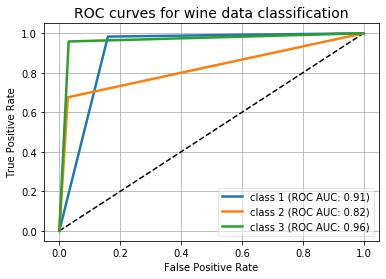



4it [06:23, 95.79s/it]


In [16]:
tree_params = dict(max_depth=range(3, 10), min_points=range(1, 5))
all_results, best_result = aux.tune_params(aux.cross_validate_tree, tree_params, func_args=(N_SPLITS, df_input),
                                           scoring_metrics='f1_score')

In [17]:
all_results

[{'accuracy': 0.8539325842696629, 'cm': array([[58,  1,  0],
         [19, 48,  4],
         [ 0,  2, 46]], dtype=int64), 'f1_score': 0.8539325842696629, 'max_depth': 3, 'min_points': 1},
 {'accuracy': 0.8539325842696629, 'cm': array([[58,  1,  0],
         [19, 48,  4],
         [ 0,  2, 46]], dtype=int64), 'f1_score': 0.8539325842696629, 'max_depth': 3, 'min_points': 3},
 {'accuracy': 0.8539325842696629, 'cm': array([[58,  1,  0],
         [19, 48,  4],
         [ 0,  2, 46]], dtype=int64), 'f1_score': 0.8539325842696629, 'max_depth': 8, 'min_points': 1},
 {'accuracy': 0.8539325842696629, 'cm': array([[58,  1,  0],
         [19, 48,  4],
         [ 0,  2, 46]], dtype=int64), 'f1_score': 0.8539325842696629, 'max_depth': 8, 'min_points': 3}]

In [18]:
best_result

{'accuracy': 0.8539325842696629, 'cm': array([[58,  1,  0],
        [19, 48,  4],
        [ 0,  2, 46]], dtype=int64), 'f1_score': 0.8539325842696629, 'max_depth': 3, 'min_points': 1}

## Other classification models

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Split the dataset into X (input attributes) and y (labels)

In [28]:
df_y = tree.class_labels
df_x = tree.data[tree.input_attributes]
df_x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Random Forest Classifier

In [38]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_params = dict(max_depth=range(3,10), min_samples_leaf=range(1,5))
gscv = GridSearchCV(rf, rf_params, cv=N_SPLITS)
res = gscv.fit(df_x, df_y)

c:\users\anima\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
res.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [42]:
res.best_score_

0.9887640449438202

In [43]:
res.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rf_stats = aux.cross_validate_sklearn(res.best_estimator_, n_splits=10, data_x=df_x, data_y=df_y)

AttributeError: module 'aux_functions' has no attribute 'cross_validate_sklearn'